In [15]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'handcalcs'

In [16]:
def pos(a,t):
    t_vec = np.array([1, t, t**2, t**3, t**4, t**5])
    q_t = t_vec.T @ a
    return q_t

def vel(a,t):
    t_vec = np.array([0, 1, 2*t, 3*t**2, 4*t**3, 5*t**4])
    v_t = t_vec.T @ a
    return v_t

def acc(a,t):
    t_vec = np.array([0, 0, 2, 6*t, 12*t**2, 20*t**3])
    alpha_t = t_vec.T @ a
    return alpha_t

def jerk(a,t):
    t_vec = np.array([0, 0, 0, 6, 24*t, 60*t**2])
    j_t = t_vec.T @ a
    return j_t

In [17]:
#%%render
import handcalcs.render
q_0 = 0
q_f = 0.3
v_0 = 0 
v_f = 0
alpha_0 = 0
alpha_f = 0

In [18]:


M = np.array([[1, t_0, t_0**2, t_0**3, t_0**4, t_0**5],
                [0, 1, 2*t_0, 3*t_0**2, 4*t_0**3, 5*t_0**4],
                [0, 0, 2, 6*t_0, 12*t_0**2, 20*t_0**3],
                [1, t_f, t_f**2, t_f**3, t_f**4, t_f**5],
                [0, 1, 2*t_f, 3*t_f**2, 4*t_f**3, 5*t_f**4],
                [0, 0, 2, 6*t_f, 12*t_f**2, 20*t_f**3]
               ])

b = np.array([q_0, v_0, alpha_0, q_f, v_f, alpha_f])
M_inv = scipy.linalg.inv(M)


t_range = np.arange(t_0,t_f, 0.001)
a = M_inv @ b
print("dtypes", M.dtype, M_inv.dtype)
print("M",M)
print("inv",M_inv)
print("mul",M@M_inv)
print("a", a)

dtypes float64 float64
M [[  1.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.]
 [  0.   0.   2.   0.   0.   0.]
 [  1.   2.   4.   8.  16.  32.]
 [  0.   1.   4.  12.  32.  80.]
 [  0.   0.   2.  12.  48. 160.]]
inv [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.44328993e-15  1.00000000e+00  6.66133815e-16 -1.44328993e-15
   1.33226763e-15 -3.88578059e-16]
 [ 0.00000000e+00  0.00000000e+00  5.00000000e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.25000000e+00 -1.50000000e+00 -7.50000000e-01  1.25000000e+00
  -1.00000000e+00  2.50000000e-01]
 [ 9.37500000e-01  1.00000000e+00  3.75000000e-01 -9.37500000e-01
   8.75000000e-01 -2.50000000e-01]
 [-1.87500000e-01 -1.87500000e-01 -6.25000000e-02  1.87500000e-01
  -1.87500000e-01  6.25000000e-02]]
mul [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.44328993e-15  1.00000000e+00  6.66133815e-16 -1.4432899

position


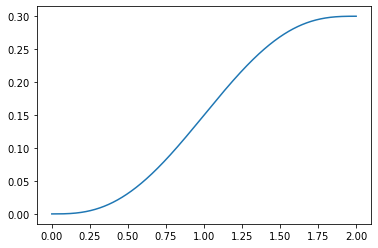

velocity


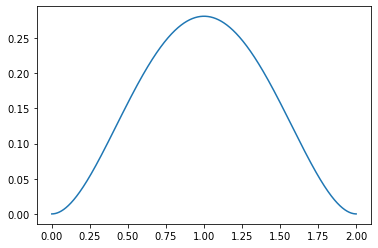

acceleration


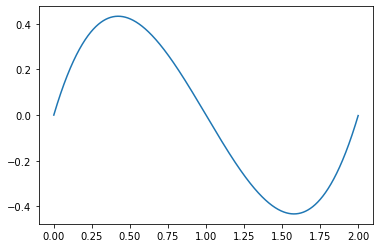

jerk


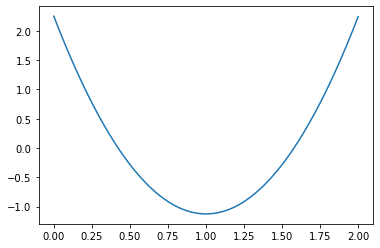

In [19]:
print("position")
plt.plot(t_range, [pos(a,t) for t in t_range])
plt.show()
print("velocity")
plt.plot(t_range, [vel(a,t) for t in t_range])
plt.show()
print("acceleration")
plt.plot(t_range, [acc(a,t) for t in t_range])
plt.show()
print("jerk")
plt.plot(t_range, [jerk(a,t) for t in t_range])
plt.show()

In [66]:
t_0 = 0.0
t_f = 0.04

M = np.array([[1, t_0, t_0**2, t_0**3, t_0**4, t_0**5],
                [0, 1, 2*t_0, 3*t_0**2, 4*t_0**3, 5*t_0**4],
                [0, 0, 2, 6*t_0, 12*t_0**2, 20*t_0**3],
                [1, t_f, t_f**2, t_f**3, t_f**4, t_f**5],
                [0, 1, 2*t_f, 3*t_f**2, 4*t_f**3, 5*t_f**4],
                [0, 0, 2, 6*t_f, 12*t_f**2, 20*t_f**3]
               ])

M_inv = scipy.linalg.inv(M)

q_increment = 0.003
v = 0

b_init = np.array([0, 0, 0, q_increment, v, 0])
b_mid = np.array([0, v, 0, q_increment, v, 0])
b_end = np.array([0, v, 0, q_increment, 0, 0])

a_init = M_inv @ b_init
a_mid = M_inv @ b_mid
a_end = M_inv @ b_end

t_range = np.arange(t_0,t_f + 0.001, 0.001)
t_init_range = np.arange(t_0,t_f + 0.001, 0.001)
t_mid_range = np.arange(t_f,2*t_f + 0.001, 0.001)
t_end_range = np.arange(2*t_f,3*t_f + 0.001, 0.001)

position


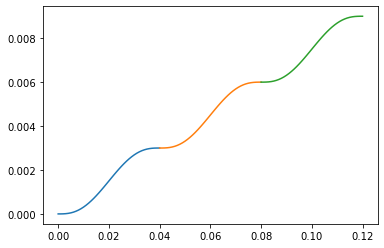

velocity


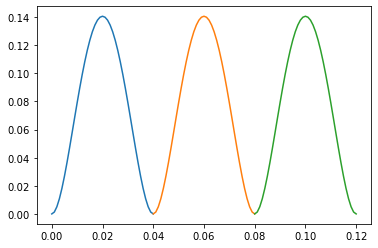

acceleration


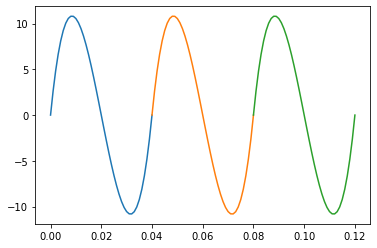

jerk


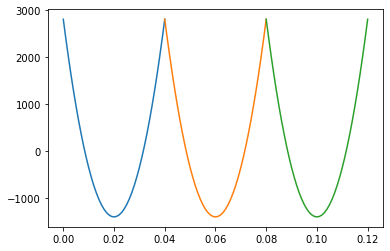

In [67]:
print("position")
plt.plot(t_init_range, [pos(a_init,t) for t in t_range])
plt.plot(t_mid_range, [pos(a_mid,t) + q_increment for t in t_range])
plt.plot(t_end_range, [pos(a_end,t) + 2*q_increment for t in t_range])
plt.show()

print("velocity")
plt.plot(t_init_range, [vel(a_init,t) for t in t_range])
plt.plot(t_mid_range, [vel(a_mid,t) for t in t_range])
plt.plot(t_end_range, [vel(a_end,t) for t in t_range])
plt.show()

print("acceleration")
plt.plot(t_init_range, [acc(a_init,t) for t in t_range])
plt.plot(t_mid_range, [acc(a_mid,t) for t in t_range])
plt.plot(t_end_range, [acc(a_end,t) for t in t_range])
plt.show()

print("jerk")
plt.plot(t_init_range, [jerk(a_init,t) for t in t_range])
plt.plot(t_mid_range, [jerk(a_mid,t) for t in t_range])
plt.plot(t_end_range, [jerk(a_end,t) for t in t_range])
plt.show()

In [103]:
t_0 = 0.0
t_f = 0.1

M = np.array([[1, t_0, t_0**2, t_0**3, t_0**4, t_0**5, t_0**6, t_0**7],
                [0, 1, 2*t_0, 3*t_0**2, 4*t_0**3, 5*t_0**4, 6*t_0**5, 7*t_0**6],
                [0, 0, 2, 6*t_0, 12*t_0**2, 20*t_0**3, 30*t_0**4, 42*t_0**5],
                [0, 0, 0, 6, 24*t_0, 60*t_0**2, 120*t_0**3, 210*t_0**4],
              
                [1, t_f, t_f**2, t_f**3, t_f**4, t_f**5, t_f**6, t_f**7],
                [0, 1, 2*t_f, 3*t_f**2, 4*t_f**3, 5*t_f**4, 6*t_f**5, 7*t_f**6],
                [0, 0, 2, 6*t_f, 12*t_f**2, 20*t_f**3, 30*t_f**4, 42*t_f**5],
                [0, 0, 0, 6, 24*t_f, 60*t_f**2, 120*t_f**3, 210*t_f**4]
               ])

M_inv = scipy.linalg.inv(M)

q_increment = 0.015
v = 0

b_init = np.array([0, 0, 0, 0, q_increment, v, 0, 0])
b_mid = np.array([0, v, 0, 0, q_increment, v, 0, 0])
b_end = np.array([0, v, 0, 0, q_increment, 0, 0, 0])

a_init = M_inv @ b_init
a_mid = M_inv @ b_mid
a_end = M_inv @ b_end

t_range = np.arange(t_0,t_f + 0.001, 0.001)
t_init_range = t_range
t_mid_range = t_range + t_f
t_end_range = t_range + 2*t_f

In [104]:
def pos_h(a,t):
    t_vec = np.array([1, t, t**2, t**3, t**4, t**5, t**6, t**7])
    q_t = t_vec.T @ a
    return q_t

def vel_h(a,t):
    t_vec = np.array([0, 1, 2*t, 3*t**2, 4*t**3, 5*t**4, 6*t**5, 7*t**6])
    v_t = t_vec.T @ a
    return v_t

def acc_h(a,t):
    t_vec = np.array([0, 0, 2, 6*t, 12*t**2, 20*t**3, 30*t**4, 42*t**5])
    alpha_t = t_vec.T @ a
    return alpha_t

def jerk_h(a,t):
    t_vec = np.array( [0, 0, 0, 6, 24*t, 60*t**2, 120*t**3, 210*t**4])
    j_t = t_vec.T @ a
    return j_t

position


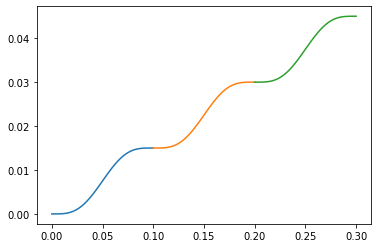

velocity


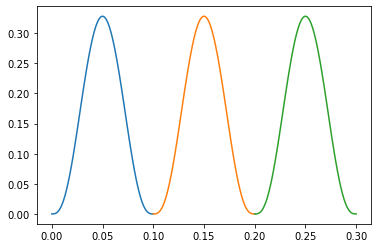

acceleration


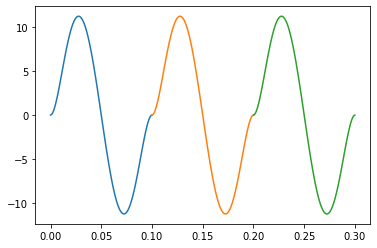

jerk


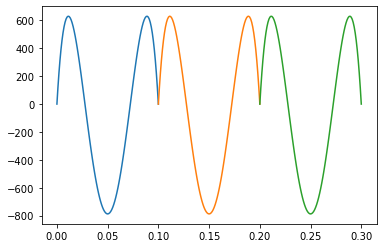

In [105]:
print("position")
plt.plot(t_init_range, [pos_h(a_init,t) for t in t_range])
plt.plot(t_mid_range, [pos_h(a_mid,t) + q_increment for t in t_range])
plt.plot(t_end_range, [pos_h(a_end,t) + 2*q_increment for t in t_range])
plt.show()

print("velocity")
plt.plot(t_init_range, [vel_h(a_init,t) for t in t_range])
plt.plot(t_mid_range, [vel_h(a_mid,t) for t in t_range])
plt.plot(t_end_range, [vel_h(a_end,t) for t in t_range])
plt.show()

print("acceleration")
plt.plot(t_init_range, [acc_h(a_init,t) for t in t_range])
plt.plot(t_mid_range, [acc_h(a_mid,t) for t in t_range])
plt.plot(t_end_range, [acc_h(a_end,t) for t in t_range])
plt.show()

print("jerk")
plt.plot(t_init_range, [jerk_h(a_init,t) for t in t_range])
plt.plot(t_mid_range, [jerk_h(a_mid,t) for t in t_range])
plt.plot(t_end_range, [jerk_h(a_end,t) for t in t_range])
plt.show()